<a href="https://colab.research.google.com/github/Ansalnakhan/TSA/blob/main/Assignment%202/MA_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 5

!pip -q install yfinance
import yfinance as yf

     |████████████████████████████████| 6.4 MB 41.4 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import pandas as pd


In [3]:
IBEX = yf.Ticker("^IBEX")

IBEX_values = IBEX.history(start="2020-06-01")

In [4]:
IBEX_values

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-06-01,7228.700195,7276.000000,7160.100098,7221.399902,291929600,0,0
2020-06-02,7264.000000,7445.299805,7236.899902,7408.100098,402947100,0,0
2020-06-03,7487.299805,7629.700195,7448.899902,7626.399902,445036400,0,0
2020-06-04,7567.700195,7669.200195,7516.000000,7566.799805,514858000,0,0
2020-06-05,7672.000000,7890.399902,7664.100098,7872.600098,573283900,0,0
...,...,...,...,...,...,...,...
2022-07-11,7994.399902,8099.799805,7980.399902,8065.200195,130231900,0,0
2022-07-12,8029.000000,8071.299805,7893.100098,8014.799805,365803600,0,0
2022-07-13,7991.299805,8002.600098,7891.500000,7944.899902,198608900,0,0


In [5]:
import matplotlib.pyplot as plt


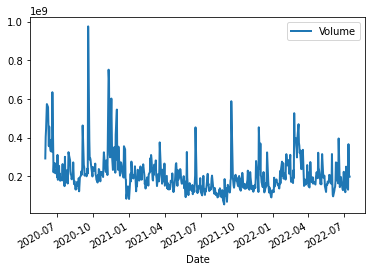

In [6]:
IBEX_values[['Volume']].plot(lw=2);

In [7]:
from statsmodels.tsa.stattools import adfuller
series = IBEX_values[["Volume"]].squeeze()
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ADF Statistic: -6.067495
p-value: 0.000000
Critical Values:
	1%: -3.442
	5%: -2.867
	10%: -2.570


In [8]:
result[1]

1.1722235779757038e-07

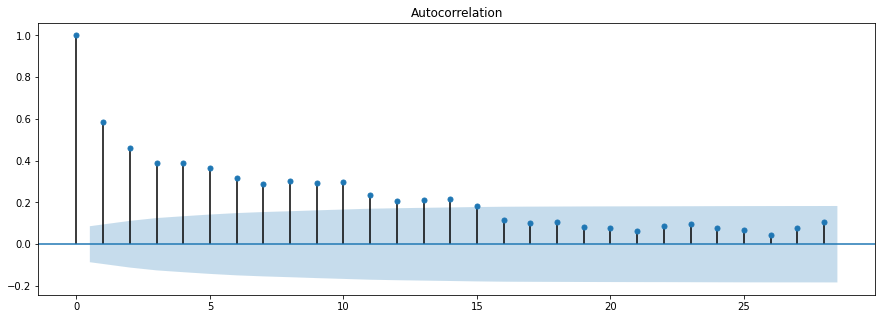

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf


plot_acf(series)
plt.show()

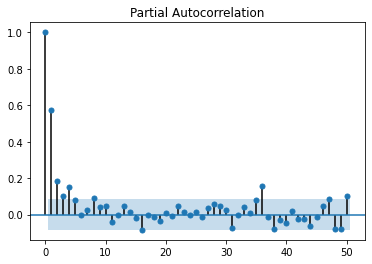

In [9]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series, lags=50)
plt.show()

In [10]:
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess
series
from statsmodels.tsa.arima_model import ARIMA
ARMA_model = ARIMA(endog=series, order=(0, 0, 15))
results = ARMA_model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                 Volume   No. Observations:                  547
Model:                    ARMA(0, 15)   Log Likelihood              -10690.240
Method:                       css-mle   S.D. of innovations       74302240.054
Date:                Sat, 16 Jul 2022   AIC                          21414.480
Time:                        04:48:00   BIC                          21487.655
Sample:                             0   HQIC                         21443.082
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.099e+08   1.12e+07     18.694      0.000    1.88e+08    2.32e+08
ma.L1.Volume      0.4056      0.043      9.498      0.000       0.322       0.489
ma.L2.Volume      0.2742      0.046     

In [11]:
pred=[]
pred = results.predict(0,517)


In [12]:
pred

Date
2020-06-01    2.099388e+08
2020-06-02    2.539157e+08
2020-06-03    3.099739e+08
2020-06-04    3.436307e+08
2020-06-05    3.804147e+08
                  ...     
2022-05-31    1.822388e+08
2022-06-01    2.383286e+08
2022-06-02    1.916624e+08
2022-06-03    1.550228e+08
2022-06-06    1.637134e+08
Length: 518, dtype: float64

In [13]:
series

Date
2020-06-01    291929600
2020-06-02    402947100
2020-06-03    445036400
2020-06-04    514858000
2020-06-05    573283900
                ...    
2022-07-11    130231900
2022-07-12    365803600
2022-07-13    198608900
2022-07-14    197271700
2022-07-15    197816100
Name: Volume, Length: 547, dtype: int64

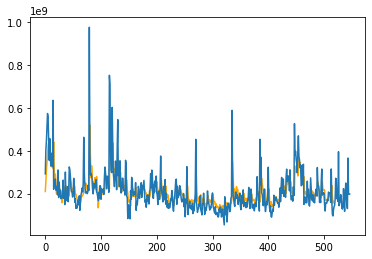

In [14]:
k=[j for j in pred]
plt.plot(k,color="orange")

p=[i for i in series]
plt.plot(p)
plt.show()

In [15]:
ARMA_model = ARIMA(endog=series[:500], order=(0, 0, 20))
results = ARMA_model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                 Volume   No. Observations:                  500
Model:                    ARMA(0, 20)   Log Likelihood               -9775.310
Method:                       css-mle   S.D. of innovations       74819754.995
Date:                Sat, 16 Jul 2022   AIC                          19594.620
Time:                        04:50:57   BIC                          19687.342
Sample:                             0   HQIC                         19631.004
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.125e+08   1.43e+07     14.912      0.000    1.85e+08     2.4e+08
ma.L1.Volume      0.4084      0.045      9.117      0.000       0.321       0.496
ma.L2.Volume      0.2754      0.049     

In [16]:
series

Date
2020-06-01    291929600
2020-06-02    402947100
2020-06-03    445036400
2020-06-04    514858000
2020-06-05    573283900
                ...    
2022-07-11    130231900
2022-07-12    365803600
2022-07-13    198608900
2022-07-14    197271700
2022-07-15    197816100
Name: Volume, Length: 547, dtype: int64

In [17]:
pred = results.predict(0,517)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


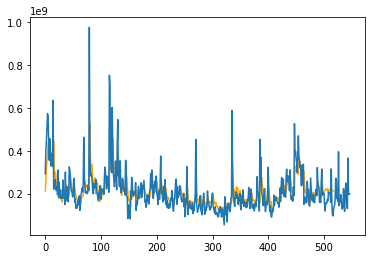

In [18]:
k=[j for j in pred]
plt.plot(k,color="orange")

p=[i for i in series]
plt.plot(p)
plt.show()

In [19]:

from sklearn.metrics import mean_squared_error
  


MSE = np.square(np.subtract(series[:500],pred[:500])).mean()


In [20]:
data2=pd.read_csv("/content/date_count.csv")


In [21]:
data2

,Date,count
0,2012-08-25,3
1,2012-08-26,3
2,2012-08-27,2
3,2012-08-28,2
4,2012-08-29,2
...,...,...
573,2014-03-21,149
574,2014-03-22,129
575,2014-03-23,119
576,2014-03-24,214


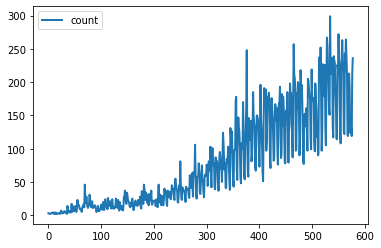

In [23]:
data2[['count']].plot(lw=2);

In [24]:
series2 = data2[["count"]].squeeze()
X = series2.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.056611
p-value: 0.953592
Critical Values:
	1%: -3.442
	5%: -2.867
	10%: -2.570


In [25]:
series2

0        3
1        3
2        2
3        2
4        2
      ... 
573    149
574    129
575    119
576    214
577    236
Name: count, Length: 578, dtype: int64

In [26]:
diff=series2.diff(1).fillna(0)

In [27]:
diff

0       0.0
1       0.0
2      -1.0
3       0.0
4       0.0
       ... 
573    25.0
574   -20.0
575   -10.0
576    95.0
577    22.0
Name: count, Length: 578, dtype: float64

In [28]:
result = adfuller(diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -9.179553
p-value: 0.000000
Critical Values:
	1%: -3.442
	5%: -2.867
	10%: -2.570


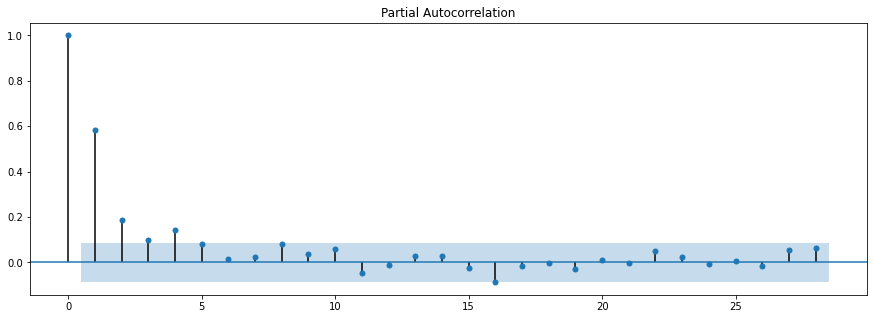

In [ ]:
plot_pacf(series)
plt.show()

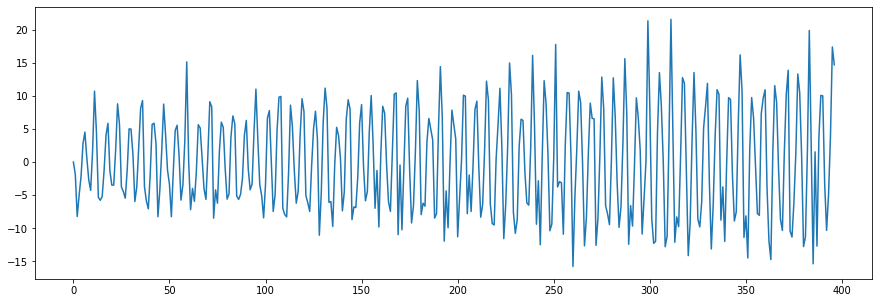

In [ ]:
plt.plot(diff)
plt.show()

In [ ]:
ARMA_model = ARIMA(endog=diff, order=(0, 0, 3))
results = ARMA_model.fit()
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:                  Value   No. Observations:                  397
Model:                     ARMA(0, 3)   Log Likelihood               -1222.622
Method:                       css-mle   S.D. of innovations              5.246
Date:                Sun, 05 Jun 2022   AIC                           2455.245
Time:                        18:30:55   BIC                           2475.164
Sample:                             0   HQIC                          2463.135
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1101      0.020      5.631      0.000       0.072       0.148
ma.L1.Value     0.1133      0.038      2.979      0.003       0.039       0.188
ma.L2.Value    -0.5018      0.042    -11.984    

In [ ]:
pred = results.predict(0,203)

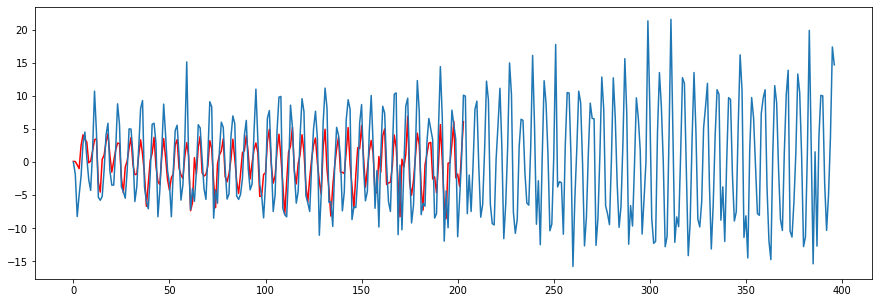

In [ ]:

plt.plot(pred,color="red")
plt.plot(diff)
plt.show()